In [64]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

## Creating a Small World Graph

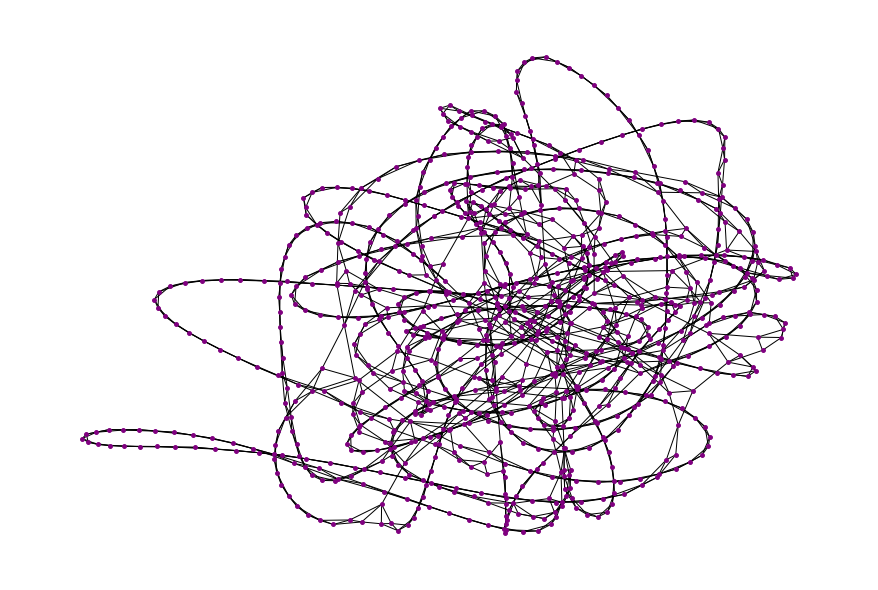

In [65]:
n = 1000  # Number of nodes
k = 4    # Each node is connected to k nearest neighbors in ring topology
p = 0.02  # Probability of rewiring each edge
beta = 0.3  # Infection probability
gamma = 0.1  # Recovery probability
mu = 0.05  # Loss of immunity probability
num_steps = 250  # Number of simulation steps

# Initialize the small-world graph
plt.figure(figsize=(12,8))
graph = nx.watts_strogatz_graph(n, k, p)
nx.draw(graph, node_size = 15, node_color='purple')

## Searching for nodes with highest Centrality Values

In [66]:
def find_highest_degree_centrality_node(graph):
    degree_centrality_scores = nx.degree_centrality(graph)
    highest_degree_centrality_node = max(degree_centrality_scores, key=degree_centrality_scores.get)
    return highest_degree_centrality_node

def find_highest_betweenness_centrality_node(graph):
    betwenness_centrality_scores = nx.betweenness_centrality(graph)
    highest_betweenness_centrality_node = max(betwenness_centrality_scores, key=betwenness_centrality_scores.get)
    return highest_betweenness_centrality_node

def find_highest_closeness_centrality_node(graph):
    closeness_centrality_scores = nx.closeness_centrality(graph)
    highest_closeness_centrality_node = max(closeness_centrality_scores, key=closeness_centrality_scores.get)
    return highest_closeness_centrality_node

def find_highest_eigenvector_centrality_node(graph):
    eigenvector_centrality_scores = nx.eigenvector_centrality_numpy(graph)
    highest_eigenvector_centrality_node = max(eigenvector_centrality_scores, key=eigenvector_centrality_scores.get)
    return highest_eigenvector_centrality_node


In [67]:
find_highest_degree_centrality_node(graph)

3

In [68]:
find_highest_betweenness_centrality_node(graph)

692

In [69]:
find_highest_closeness_centrality_node(graph)

960

In [70]:
find_highest_eigenvector_centrality_node(graph)

942

In [71]:
def initialize_state(graph, initial_infected):
    state = {}
    for node in graph.nodes():
        if node in initial_infected:
            state[node] = 'I'
        else:
            state[node] = 'S'
    return state

## SI Model

In [72]:
def si_epidemic(graph, initial_infected , beta, num_steps):
    susceptible_nodes = set(graph.nodes())
    infected_node = initial_infected
    infected_nodes = {infected_node}
    infected_history = [1]
    susceptible_history = [len(susceptible_nodes) - 1]

    for i in range(num_steps):
        newly_infected = set()
        for node in infected_nodes:
            neighbors = set(graph.neighbors(node))
            susceptible_neighbors = neighbors - infected_nodes
            for neighbor in susceptible_neighbors:
                if random.random() < beta:
                    newly_infected.add(neighbor)
        infected_nodes.update(newly_infected)
        susceptible_nodes -= infected_nodes
        infected_history.append(len(infected_nodes))
        susceptible_history.append(len(susceptible_nodes))

    return susceptible_history, infected_history

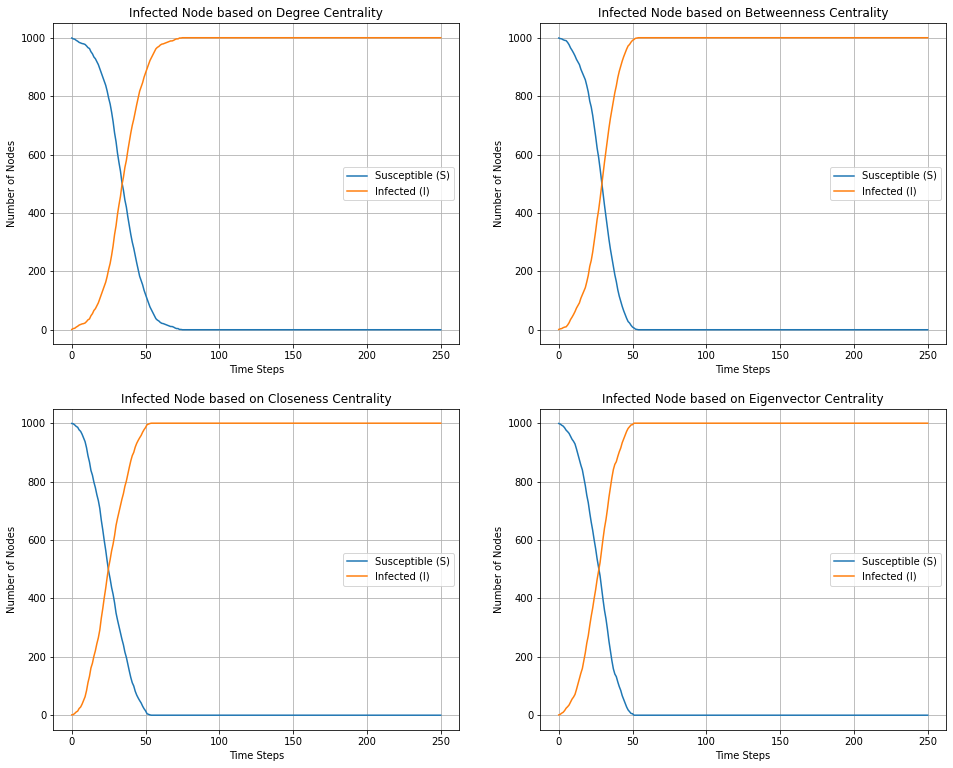

In [73]:
plt.figure(figsize=(16,13))

susceptible_history_si, infected_history_si = si_epidemic(graph, find_highest_degree_centrality_node(graph), beta, num_steps)
plt.subplot(2, 2, 1)
plt.plot(susceptible_history_si, label='Susceptible (S)')
plt.plot(infected_history_si, label='Infected (I)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Degree Centrality')
plt.legend()
plt.grid(True)

susceptible_history_si, infected_history_si = si_epidemic(graph, find_highest_betweenness_centrality_node(graph), beta, num_steps)
plt.subplot(2,2,2)
plt.plot(susceptible_history_si, label='Susceptible (S)')
plt.plot(infected_history_si, label='Infected (I)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Betweenness Centrality')
plt.legend()
plt.grid(True)

susceptible_history_si, infected_history_si = si_epidemic(graph, find_highest_closeness_centrality_node(graph), beta, num_steps)
plt.subplot(2,2,3)
plt.plot(susceptible_history_si, label='Susceptible (S)')
plt.plot(infected_history_si, label='Infected (I)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Closeness Centrality')
plt.legend()
plt.grid(True)

susceptible_history_si, infected_history_si = si_epidemic(graph, find_highest_eigenvector_centrality_node(graph), beta, num_steps)
plt.subplot(2,2,4)
plt.plot(susceptible_history_si, label='Susceptible (S)')
plt.plot(infected_history_si, label='Infected (I)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Eigenvector Centrality')
plt.legend()
plt.grid(True)

## SIR Model

In [74]:
def sir_epidemic(graph, initial_infected, beta, gamma, num_steps):
    """
    Simulate the SIR epidemic model on the given graph.

    Parameters:
        graph (nx.Graph): Graph object.
        beta (float): Infection probability.
        gamma (float): Recovery probability.
        num_steps (int): Number of simulation steps.

    Returns:
        tuple: Tuple containing lists of susceptible, infected, and recovered nodes at each time step.
    """
    susceptible_nodes = set(graph.nodes())
    infected_node = initial_infected
    infected_nodes = {infected_node}
    recovered_nodes = set()
    infected_history = [1]
    susceptible_history = [len(susceptible_nodes) - 1]
    recovered_history = [0]

    for _ in range(num_steps):
        newly_infected = set()
        newly_recovered = set()
        for node in infected_nodes:
            neighbors = set(graph.neighbors(node))
            susceptible_neighbors = neighbors - infected_nodes - recovered_nodes
            for neighbor in susceptible_neighbors:
                if random.random() < beta:
                    newly_infected.add(neighbor)
            if random.random() < gamma:
                newly_recovered.add(node)
        infected_nodes.update(newly_infected)
        recovered_nodes.update(newly_recovered)
        infected_nodes -= recovered_nodes
        susceptible_nodes -= infected_nodes | recovered_nodes
        infected_history.append(len(infected_nodes))
        susceptible_history.append(len(susceptible_nodes))
        recovered_history.append(len(recovered_nodes))

    return susceptible_history, infected_history, recovered_history


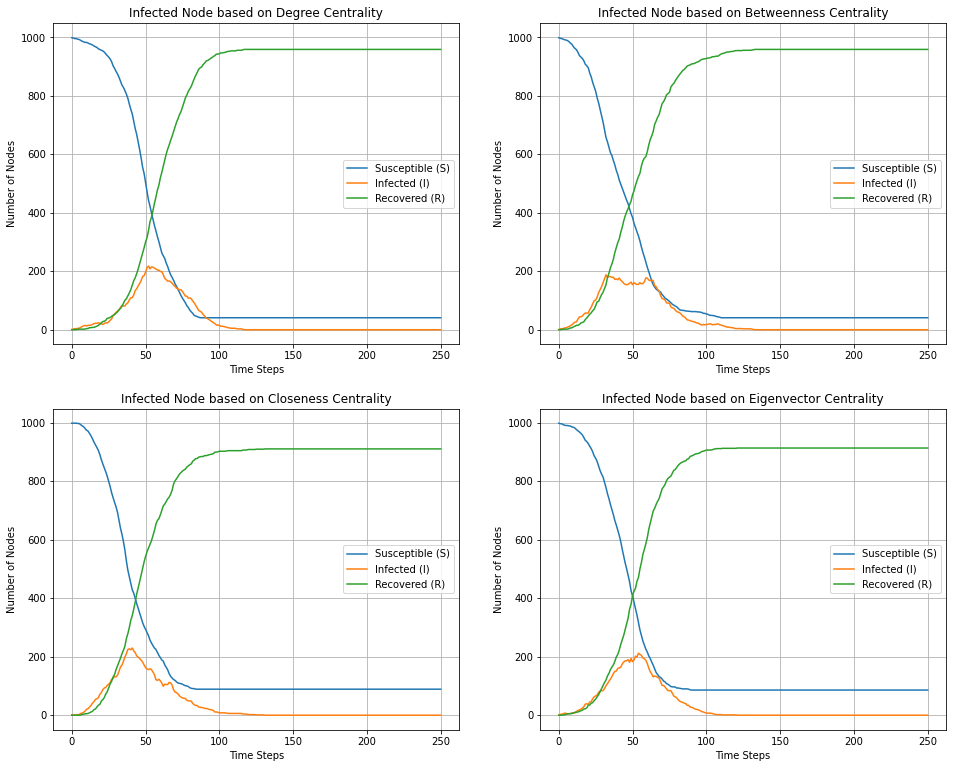

In [75]:
plt.figure(figsize=(16,13))

susceptible_history_sir, infected_history_sir, recovered_history_sir = sir_epidemic(graph, find_highest_degree_centrality_node(graph), beta, gamma, num_steps)
plt.subplot(2, 2, 1)
plt.plot(susceptible_history_sir, label='Susceptible (S)')
plt.plot(infected_history_sir, label='Infected (I)')
plt.plot(recovered_history_sir, label='Recovered (R)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Degree Centrality')
plt.legend()
plt.grid(True)

susceptible_history_sir, infected_history_sir, recovered_history_sir = sir_epidemic(graph, find_highest_betweenness_centrality_node(graph), beta, gamma, num_steps)
plt.subplot(2,2,2)
plt.plot(susceptible_history_sir, label='Susceptible (S)')
plt.plot(infected_history_sir, label='Infected (I)')
plt.plot(recovered_history_sir, label='Recovered (R)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Betweenness Centrality')
plt.legend()
plt.grid(True)

susceptible_history_sir, infected_history_sir, recovered_history_sir = sir_epidemic(graph, find_highest_closeness_centrality_node(graph), beta, gamma, num_steps)
plt.subplot(2,2,3)
plt.plot(susceptible_history_sir, label='Susceptible (S)')
plt.plot(infected_history_sir, label='Infected (I)')
plt.plot(recovered_history_sir, label='Recovered (R)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Closeness Centrality')
plt.legend()
plt.grid(True)

susceptible_history_sir, infected_history_sir, recovered_history_sir = sir_epidemic(graph, find_highest_eigenvector_centrality_node(graph), beta, gamma, num_steps)
plt.subplot(2,2,4)
plt.plot(susceptible_history_sir, label='Susceptible (S)')
plt.plot(infected_history_sir, label='Infected (I)')
plt.plot(recovered_history_sir, label='Recovered (R)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Eigenvector Centrality')
plt.legend()
plt.grid(True)

## SIS Model

In [76]:
def sis_epidemic(graph, initial_infected, beta, gamma, num_steps):
    state = initialize_state(graph, initial_infected)
    susceptible_history = [len(graph) - len(initial_infected)]  # Initialize susceptible count
    infected_history = [len(initial_infected)]  # Initialize infected count
    for _ in range(num_steps):
        newly_infected = 0  # Initialize count for newly infected nodes in each step
        newly_recovered = 0  # Initialize count for newly recovered nodes in each step

        for node in graph.nodes():
            if state[node] == 'S':
                neighbors = graph.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        state[node] = 'I'  # Update state of susceptible node to infected
                        newly_infected += 1  # Increment count of newly infected nodes
                        break
            elif state[node] == 'I' and random.random() < gamma:
                state[node] = 'S'  # Update state of infected node to susceptible
                newly_recovered += 1  # Increment count of newly recovered nodes
        susceptible_history.append(susceptible_history[-1] - newly_infected + newly_recovered)  # Update susceptible count
        infected_history.append(infected_history[-1] + newly_infected - newly_recovered)  # Update infected count
    return susceptible_history, infected_history

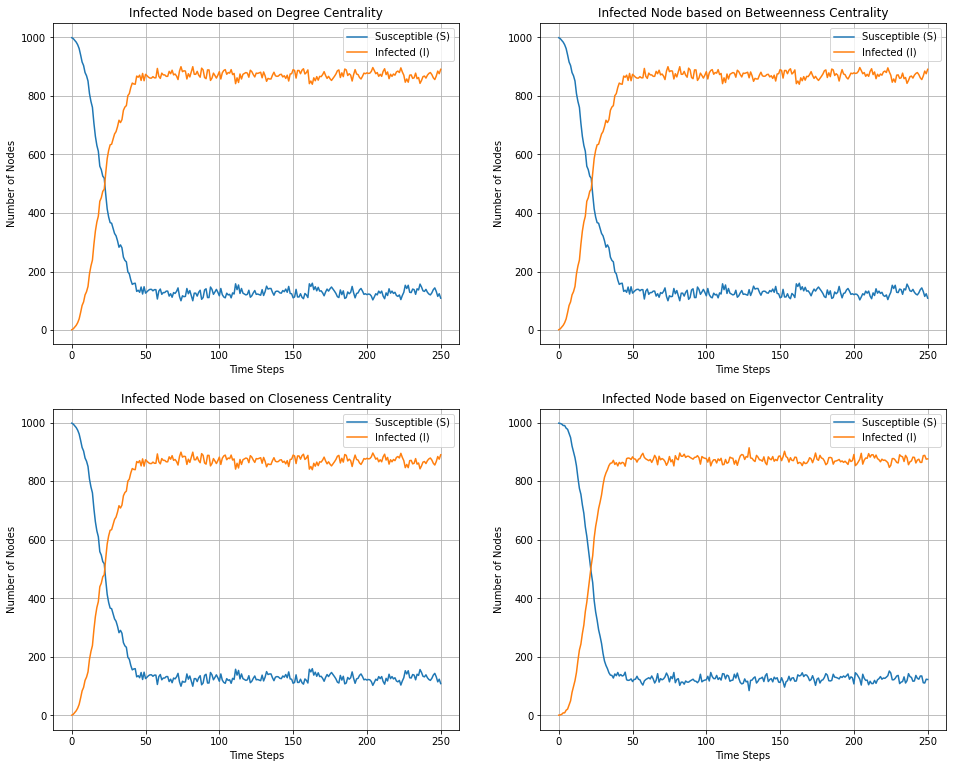

In [77]:
plt.figure(figsize=(16,13))

susceptible_history_sis, infected_history_sis = sis_epidemic(graph, [find_highest_degree_centrality_node(graph)], beta, gamma, num_steps)
plt.subplot(2, 2, 1)
plt.plot(susceptible_history_sis, label='Susceptible (S)')
plt.plot(infected_history_sis, label='Infected (I)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Degree Centrality')
plt.legend()
plt.grid(True)

susceptible_history_si, infected_history_si = sis_epidemic(graph, [find_highest_betweenness_centrality_node(graph)], beta, gamma, num_steps)
plt.subplot(2,2,2)
plt.plot(susceptible_history_sis, label='Susceptible (S)')
plt.plot(infected_history_sis, label='Infected (I)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Betweenness Centrality')
plt.legend()
plt.grid(True)

susceptible_history_si, infected_history_si = sis_epidemic(graph, [find_highest_closeness_centrality_node(graph)], beta, gamma, num_steps)
plt.subplot(2,2,3)
plt.plot(susceptible_history_sis, label='Susceptible (S)')
plt.plot(infected_history_sis, label='Infected (I)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Closeness Centrality')
plt.legend()
plt.grid(True)

susceptible_history_sis, infected_history_sis = sis_epidemic(graph, [find_highest_eigenvector_centrality_node(graph)], beta, gamma, num_steps)
plt.subplot(2,2,4)
plt.plot(susceptible_history_si, label='Susceptible (S)')
plt.plot(infected_history_si, label='Infected (I)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Eigenvector Centrality')
plt.legend()
plt.grid(True)

## SIRS Model

In [78]:
def sirs_epidemic(graph, initial_infected, beta, gamma, mu, num_steps):
    state = initialize_state(graph, initial_infected)
    susceptible_history = [len(graph) - len(initial_infected)]  # Initialize susceptible count
    infected_history = [len(initial_infected)]  # Initialize infected count
    recovered_history = [0]  # Initialize recovered count
    for _ in range(num_steps):
        newly_infected = 0  # Initialize count for newly infected nodes in each step
        newly_recovered = 0  # Initialize count for newly recovered nodes in each step
        newly_susceptible = 0  # Initialize count for newly susceptible nodes in each step
        for node in graph.nodes():
            if state[node] == 'S':
                neighbors = graph.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        state[node] = 'I'  # Update state of susceptible node to infected
                        newly_infected += 1  # Increment count of newly infected nodes
                        break
            elif state[node] == 'I' and random.random() < gamma:
                state[node] = 'R'  # Update state of infected node to recovered
                newly_recovered += 1  # Increment count of newly recovered nodes
            elif state[node] == 'R' and random.random() < mu:
                state[node] = 'S'  # Update state of recovered node to susceptible
                newly_susceptible += 1  # Increment count of newly susceptible nodes
        susceptible_history.append(susceptible_history[-1] + newly_susceptible - newly_infected)
        infected_history.append(infected_history[-1] + newly_infected - newly_recovered)
        recovered_history.append(recovered_history[-1] + newly_recovered)
    return susceptible_history, infected_history, recovered_history

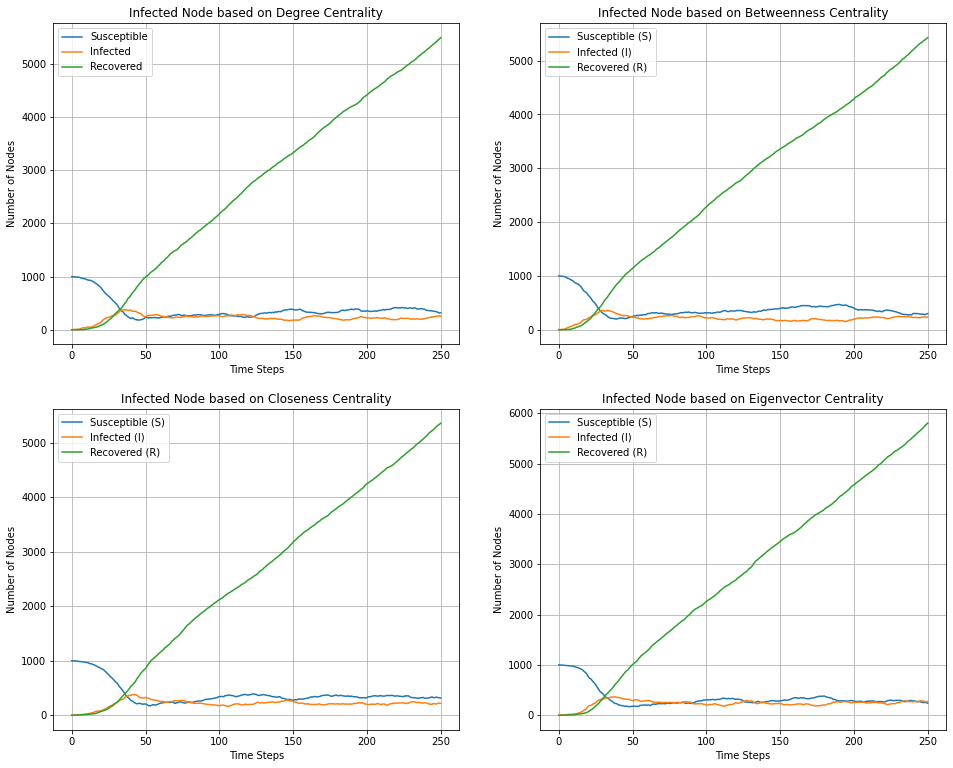

In [79]:
plt.figure(figsize=(16,13))

susceptible_history_sirs, infected_history_sirs, recovered_history_sirs = sirs_epidemic(graph, [find_highest_degree_centrality_node(graph)], beta, gamma, mu, num_steps)
plt.subplot(2, 2, 1)
plt.plot(range(num_steps + 1), susceptible_history_sirs, label='Susceptible')
plt.plot(range(num_steps + 1), infected_history_sirs, label='Infected')
plt.plot(range(num_steps + 1), recovered_history_sirs, label='Recovered')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Degree Centrality')
plt.legend()
plt.grid(True)

susceptible_history_sirs, infected_history_sirs, recovered_history_sirs = sirs_epidemic(graph, [find_highest_betweenness_centrality_node(graph)], beta, gamma, mu, num_steps)
plt.subplot(2,2,2)
plt.plot(susceptible_history_sirs, label='Susceptible (S)')
plt.plot(infected_history_sirs, label='Infected (I)')
plt.plot(recovered_history_sirs, label='Recovered (R)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Betweenness Centrality')
plt.legend()
plt.grid(True)

susceptible_history_sirs, infected_history_sirs, recovered_history_sirs = sirs_epidemic(graph, [find_highest_closeness_centrality_node(graph)], beta, gamma, mu, num_steps)
plt.subplot(2,2,3)
plt.plot(susceptible_history_sirs, label='Susceptible (S)')
plt.plot(infected_history_sirs, label='Infected (I)')
plt.plot(recovered_history_sirs, label='Recovered (R)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Closeness Centrality')
plt.legend()
plt.grid(True)

susceptible_history_sirs, infected_history_sirs, recovered_history_sirs = sirs_epidemic(graph, [find_highest_eigenvector_centrality_node(graph)], beta, gamma, mu, num_steps)
plt.subplot(2,2,4)
plt.plot(susceptible_history_sirs, label='Susceptible (S)')
plt.plot(infected_history_sirs, label='Infected (I)')
plt.plot(recovered_history_sirs, label='Recovered (R)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.title('Infected Node based on Eigenvector Centrality')
plt.legend()
plt.grid(True)